[Reference](https://medium.com/analytics-vidhya/assessment-of-accuracy-metrics-for-time-series-forecasting-bc115b655705)

In [1]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 13.3 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.2.0-py3-none-any.whl size=158196 sha256=b4eefccc49242973dab82cd3352926da52bd8141da4ecf663cf3955fe737f6c5
  Stored in directory: /root/.cache/pip/wheels/5a/b5/4e/216953a1c711da55de29ed7ecf158b4a5bf32ef93d69ad66dd
Successfully built fugue-s

In [2]:
# Import necessary libraries
# NumPy will be used for numerical operations and array handling.
import numpy as np

# Pandas will be used to work with time series data using DataFrames.
import pandas as pd

# Seaborn and Matplotlib will be used for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Statsmodels will be used for time series decomposition and stationarity testing.
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# The statsforecast library will be used for time series forecasting.
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# Scikit-learn's metrics will be used to evaluate the forecast accuracy.
from sklearn.metrics import mean_absolute_error, mean_squared_error

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# Replace 'your_data.csv' with your actual dataset filename
df = pd.read_csv('https://raw.githubusercontent.com/Satyajit-Chaudhuri/Time-Series-Analysis/main/Accuracy_Metrics_For_Forecasting/Electric_Production.csv', parse_dates=['Date'], index_col='Date')
df = df.resample("M").max()

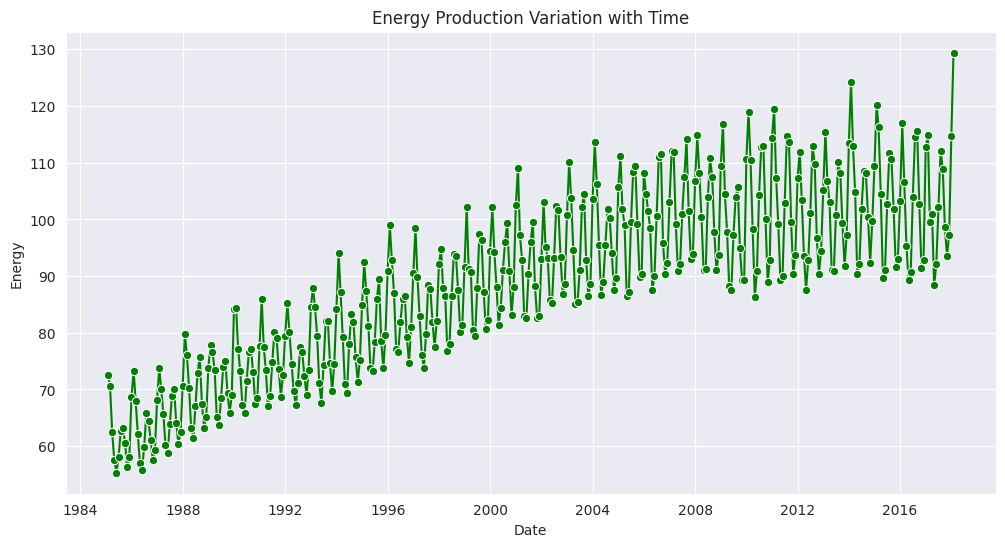

In [4]:
# Set the style to dark grid for better visibility
sns.set_style("darkgrid")

# Create the plot figure
plt.figure(figsize=(12, 6))

# Plot the time series data with green line color and markers
sns.lineplot(data=df, x=df.index, y='Energy', marker='o', color='green')

# Set the title and axis labels
plt.title('Energy Production Variation with Time')
plt.xlabel('Date')
plt.ylabel('Energy')

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

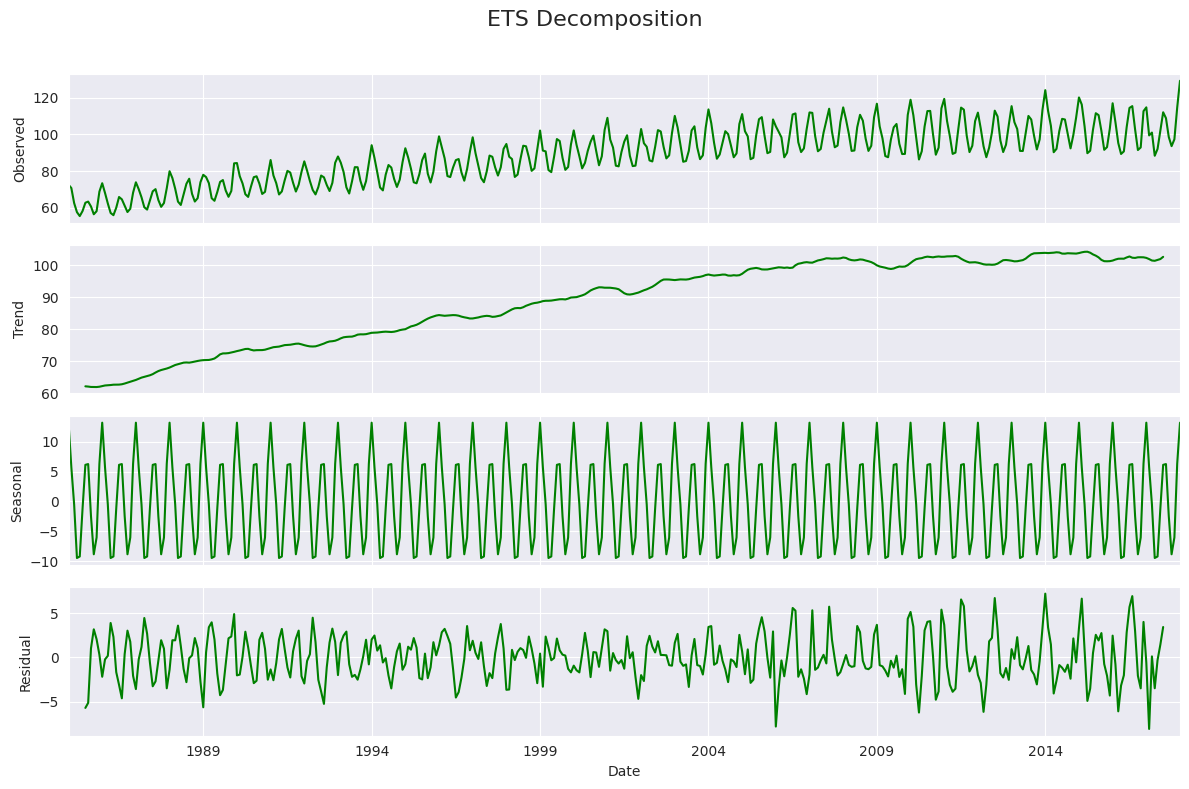

In [5]:
# Perform decomposition
decomposition = seasonal_decompose(df['Energy'], model='additive', period=12)
# Create custom subplots for each component
# Initialize a figure with 4 subplots arranged vertically
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Plot the observed component in the first subplot with green line color
decomposition.observed.plot(ax=axes[0], color='green')
axes[0].set_ylabel('Observed')
# Plot the trend component in the second subplot with green line color
decomposition.trend.plot(ax=axes[1], color='green')
axes[1].set_ylabel('Trend')
# Plot the seasonal component in the third subplot with green line color
decomposition.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
# Plot the residual component in the fourth subplot with green line color
decomposition.resid.plot(ax=axes[3], color='green')
axes[3].set_ylabel('Residual')
# Set a common X-axis label
plt.xlabel('Date')
# Set the main title for the entire plot
plt.suptitle('ETS Decomposition', fontsize=16)
# Adjust subplot spacing and position the main title
plt.tight_layout()
plt.subplots_adjust(top=0.9)
# Display the plot
plt.show()

In [6]:
# Perform the Augmented Dickey-Fuller (ADF) test to assess stationarity
# Get the ADF test results
result = adfuller(df['Energy'])

# Print the ADF Statistic
print("ADF Statistic:", result[0])

# Print the p-value
print("p-value:", result[1])

# Print the Critical Values
print("Critical Values:", result[4])

# Check the p-value against the significance level (0.05) to make a stationarity inference
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data has no unit root, indicating seasonality.")
else:
    print("Fail to reject the null hypothesis. Data has a unit root, indicating non-seasonality.")

ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}
Fail to reject the null hypothesis. Data has a unit root, indicating non-seasonality.


In [7]:
df = df.reset_index()

In [8]:
input_df = pd.DataFrame({'unique_id':[1.0]*len(df),'ds':df["Date"], 'y':df["Energy"],})
input_df.head()

,unique_id,ds,y
0,1.0,1985-01-31,72.5052
1,1.0,1985-02-28,70.6720
2,1.0,1985-03-31,62.4502
3,1.0,1985-04-30,57.4714
4,1.0,1985-05-31,55.3151


In [9]:
# Split the data into training and testing sets (90% train, 10% test)
train_size = int(len(input_df) * 0.9)
train_data = input_df.iloc[:train_size]
test_data = input_df.iloc[train_size:]

# Define the season length as 12 months for monthly data
season_length = 12

# Define a list of models for forecasting
models = [AutoARIMA(season_length=season_length)] # ARIMA model with automatic order selection and seasonal component

# Instantiate the StatsForecast class with models, data frequency ('M' for monthly),
# and parallel computation on all CPU cores (n_jobs=-1)
forecast = StatsForecast(
    models=models, # models for forecasting
    freq='M',  # frequency of the data
    n_jobs=-1  # number of jobs to run in parallel, -1 means using all processors
)

# Fit the forecasting models to the training data
forecast.fit(train_data)

# Perform the forecast for the length of the test data
prediction = forecast.predict(h=len(test_data))

# Merge the test data with the forecasted values
final_test_data = pd.merge(test_data, prediction)

# Display the first few rows of the merged data
final_test_data.head()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,unique_id,ds,y,AutoARIMA
0,1.0,2014-10-31,92.3837,92.581223
1,1.0,2014-11-30,99.7033,96.334389
2,1.0,2014-12-31,109.3477,110.274155
3,1.0,2015-01-31,120.2696,118.533691
4,1.0,2015-02-28,116.3788,108.715614


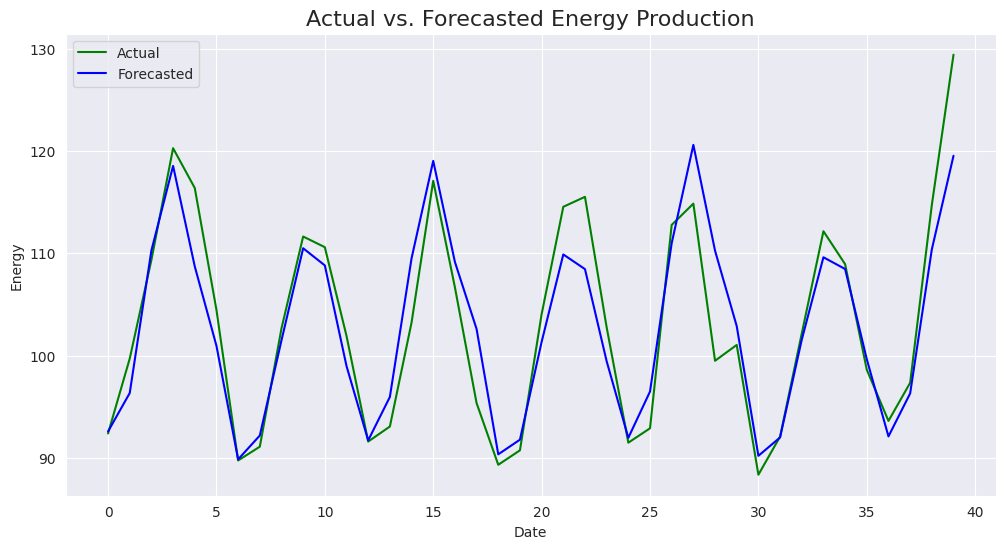

In [10]:
# Set the style to dark grid for better visibility
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Plot the actual data (y) in green
sns.lineplot(data=final_test_data, x=final_test_data.index, y='y', color='green', label='Actual')

# Plot the forecasted data in blue
sns.lineplot(data=final_test_data, x=final_test_data.index, y='AutoARIMA', color='blue', label='Forecasted')

# Set the title and axis labels
plt.title('Actual vs. Forecasted Energy Production', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Energy')

# Display a legend
plt.legend()

# Show the plot
plt.show()

In [11]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(final_test_data['y'], final_test_data['AutoARIMA'])

# Print MAE
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 2.8489


In [12]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(final_test_data['y'], final_test_data['AutoARIMA'],
                          squared=False)

# Print the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 3.8863


In [13]:
mape = np.mean(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])
/ final_test_data['y'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

Mean Absolute Percentage Error (MAPE): 2.6810


In [14]:
smape = np.mean((np.abs(final_test_data['y'] - final_test_data['AutoARIMA']) /((np.abs(final_test_data['y']) +  np.abs(final_test_data['AutoARIMA'])) / 2))) * 100
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.4f}")

Symmetric Mean Absolute Percentage Error (SMAPE): 2.6773


In [15]:
mdape = np.median(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])/ final_test_data['y']))*100
print(f"Median Absolute Percentage Error (MDAPE): {mdape:.4f}")

Median Absolute Percentage Error (MDAPE): 1.7398


In [16]:
gmrae =np.prod(np.abs((final_test_data['y'] - final_test_data['AutoARIMA'])/ final_test_data['y']) ** (1/len(final_test_data["y"])))*100

print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae:.4f}")

Geometric Mean Relative Absolute Error (GMRAE): 1.6522
